<a href="https://colab.research.google.com/github/nikopj/SummerML/blob/master/Day6/mnist_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification via a Neural Network

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for for training and testing models in machine learning. 

In this demo, we will try a simple neural network to classify the digits. We will learn several important features of the `keras` package in addition to the concepts shown in the [simple neural network example](./synthetic.ipynb):

* How to construct multi-class classifiers using categorical cross entropy.
* How to optimize using mini-batches.
* How to save and load the model after training.  



## Loading the Keras package and the MNIST data

We first load the `Tensorflow` package as in the [simple neural network example](./synthetic.ipynb).

In [0]:
import tensorflow as tf

We also load some other common packages.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we get the MNIST data. We reshape and rescale the input `X` from values from -1 to 1 since this works better for the neural network.

In [0]:
(Xtr,ytr),(Xts,yts) = tf.keras.datasets.mnist.load_data()

Xtr = 2*(Xtr/255 - 0.5)
ntr, nrow, ncol = Xtr.shape
Xtr = Xtr.reshape((ntr,nrow*ncol))

Xts = 2*(Xts/255 - 0.5)
nts, nrow, ncol = Xts.shape
Xts = Xts.reshape((nts,nrow*ncol))

11493376/11490434 [==============================] - 0s 0us/step


We will also use the `plt_digit` function to display digits.

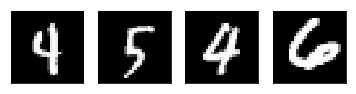

In [0]:
def plt_digit(x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    
# Select random digits
nplt = 4
nsamp = Xtr.shape[0]
Iperm = np.random.permutation(nsamp) 

#We use np.random.permutation(nsamp) to shuffle the digit images, since MNIST 
#stores them in order.

# Plot the images using the subplot command
for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt,i+1)
    plt_digit(Xtr[ind,:])

## Creating a Simple Neural Network.

To create the neural network, we first import the appropriate sub-packages.

In [0]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation

Next, we clear the session. Though this step is not necessary, it is a good practice as it clears any model layers that you have built before, so that there are no unwanted additional layers.  

In [0]:
import tensorflow.keras.backend as K
K.clear_session()

Now we create a very simple network.  The features are:
*  We have one hidden layer with `nh=100` units.  
*  One output layer with `nout=10` units, one for each of the 10 possible classes
*  The output activation is `softmax`, which is used for multi-class targets

In [0]:
nin = Xtr.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = int(np.max(ytr)+1)    # number of outputs = 10 since there are 10 classes
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='softmax', name='output'))

Instructions for updating:
Colocations handled automatically by placer.


We print the model summary. 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Training the Network

To train the network, we have to select an optimizer and a loss function.  Since this is a multi-class classification problem, we select the `sparse_categorial_crossentropy` loss. 
We use the `adam` optimizer.  

You may want to play with the learning rate `lr`.   We also set the `metrics` that we wish to track during the optimization.  In this case, we select `accuracy` on the training set.

In [0]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Keras provides a simple method `fit` to run the optimization.  You simply specify the number of epochs and the batch size, both discussed in class.  In addition, we specify the `validation_data` so that it can print the accuracy on the test data set as it performs the optimization.

In [0]:
hist = model.fit(Xtr, ytr, epochs=30, batch_size=100, validation_data=(Xts,yts))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5095 - acc: 0.8685 - val_loss: 0.2804 - val_acc: 0.9214
Epoch 2/30
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2570 - acc: 0.9268 - val_loss: 0.2155 - val_acc: 0.9386
Epoch 3/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2018 - acc: 0.9435 - val_loss: 0.1806 - val_acc: 0.9474
Epoch 4/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1656 - acc: 0.9528 - val_loss: 0.1522 - val_acc: 0.9560
Epoch 5/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1423 - acc: 0.9595 - val_loss: 0.1398 - val_acc: 0.9603
Epoch 6/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1250 - acc: 0.9651 - val_loss: 0.1274 - val_acc: 0.9629
Epoch 7/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1087 - acc: 0.9691 - val_loss: 0.

After running the 10 epochs, you should obtain a test accuracy of around 96.5%.  If we run it for another a few epochs, we can get slightly higher results.  We can just run the `model.fit` command again, and it will start where it left off. You should get a little more than 97% accuracy. 

Plot the training accuracy and validation accuracy as a function of epoches.
We see that the training accuracy keeps growing to 1, while the validation accuracy saturates to a value around 0.97

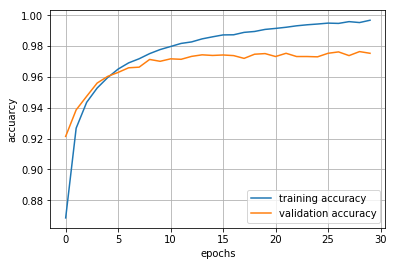

In [0]:
tr_accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuarcy')
plt.legend(['training accuracy', 'validation accuracy'])

## Saving and Loading the model

Since the training takes a long time, it is useful to save the results.  See the [keras page](https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model) for many more useful saving and loading features.

In [0]:
model.save("mnist_mod.h5")

We can now reload the model with the `load_model` command.

In [0]:
from tensorflow.keras.models import load_model

model = load_model("mnist_mod.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


We can test the performance on the test data set.

In [0]:
score, acc = model.evaluate(Xts, yts, verbose=1)
print("accuracy = %f" % acc)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0791 - acc: 0.9753
accuracy = 0.975300
